In [ ]:
# Lecture 1: Main takeaway was Big O notation, and determining complexity of algorithms

In [ ]:
# Big O measures the relationship between the size of the input and the number of operations in an algorithm

# If regardless of the number of elements, the number of operations (or steps) is constant, then the Big O is 1 O(1)
# If for every element, you have to do a fixed set of operations, then it's linear O(n)
# If for n elements, you have to do log(n) operations (think dividing the input in half untill you reach size 1), then it O(nlogn)
# If for n elements, you have to do an operation for every element (simple sorting algorithms), then it's O(n^2)

In [1]:
import timeit
import matplotlib.pyplot as plt
import random

# O(1)
def get_first_element(lst):
    return lst[0]


def plot_constant_complexity():
    input_sizes = [100, 500, 1000, 2000, 5000, 10000]
    execution_times_constant = []
    for size in input_sizes:
        lst = list(range(size))
        execution_time = timeit.timeit(lambda: get_first_element(lst), number=10000)
        execution_times_constant.append(execution_time)

    return execution_times_constant

Matplotlib is building the font cache; this may take a moment.


In [2]:
import timeit
import matplotlib.pyplot as plt
import random

#O(n)
def linear_search(lst, target):
    for item in lst:
        if item == target:
            return True
    return False


def plot_linear_complexity():
    input_sizes = [100, 500, 1000, 2000, 5000, 10000]
    execution_times_linear = []
    for size in input_sizes:
        lst = list(range(size))
        target = random.randint(0, size - 1)
        execution_time = timeit.timeit(lambda: linear_search(lst, target), number=10000)
        execution_times_linear.append(execution_time)

    return execution_times_linear

In [3]:
import timeit
import matplotlib.pyplot as plt
import random

#O(n^2)
def bubble_sort(lst):
    n = len(lst)
    for i in range(n):
        for j in range(0, n - i - 1):
            if lst[j] > lst[j + 1]:
                lst[j], lst[j + 1] = lst[j + 1], lst[j]


def plot_quadratic_complexity():
    execution_times_exp = []
    input_sizes = [100, 500, 1000, 2000, 5000, 10000]


    for size in input_sizes:
        lst = random.sample(range(1, 20000), size)
        execution_time = timeit.timeit(lambda: bubble_sort(lst.copy()), number=10)
        execution_times_exp.append(execution_time)

    return execution_times_exp

In [4]:
import timeit
import matplotlib.pyplot as plt
import random

#O(logn)
def binary_search(lst, target):
    low, high = 0, len(lst) - 1
    while low <= high:
        mid = (low + high) // 2
        if lst[mid] == target:
            return True
        elif lst[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return False


def plot_logarithmic_complexity():
    input_sizes = [100, 500, 1000, 2000, 5000, 10000]
    execution_times_log = []

    for size in input_sizes:
        sorted_lst = sorted(random.sample(range(0, size), size))
        target = random.choice(sorted_lst)
        execution_time = timeit.timeit(lambda: binary_search(sorted_lst, target), number=10000)
        execution_times_log.append(execution_time)

    return execution_times_log

In [32]:
# etc = plot_constant_complexity()
# etl = plot_linear_complexity()
ete = plot_quadratic_complexity()
# etlog = plot_logarithmic_complexity()

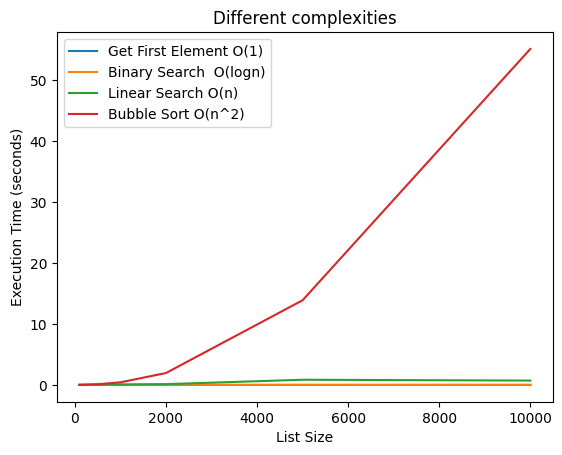

In [35]:
input_sizes = [100, 500, 1000, 2000, 5000, 10000]
plt.plot(input_sizes, etc, label='Get First Element O(1)')
plt.plot(input_sizes, etlog, label='Binary Search  O(logn)')
plt.plot(input_sizes, etl, label='Linear Search O(n)')
plt.plot(input_sizes, ete, label='Bubble Sort O(n^2)')
plt.xlabel('List Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Different complexities')
plt.legend()
plt.show()

In [ ]:
# Lecture 2: Data strctures

# If you have unordered data, use sets or maps (dictionaries), they get you O(1) operations (to use sets, or maps, the keys or elements need to be unique)
# If you have ordered data, lists are your main options (in some scenarios, stacks and queues make sense)

# If you need to sort data, never do it  yourself. Sorting algorithms are already provided to you, and those are more efficient than
# sorting algorithms you can implement. Python's Timsort is much faster than insert/selection/bubble sort.
# And it's generally better than quicksort/mergesort

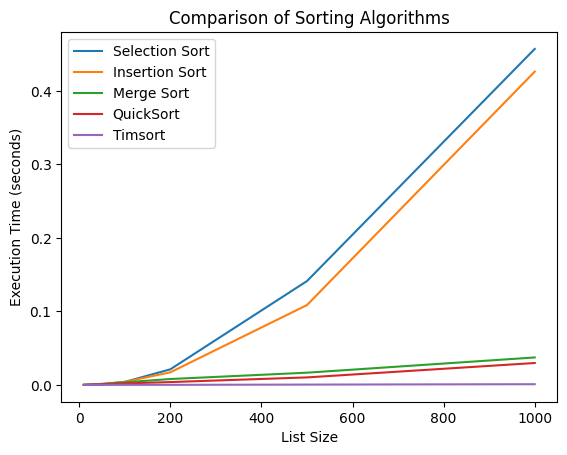

In [ ]:
import timeit
import matplotlib.pyplot as plt
import random

def selection_sort(lst):
    n = len(lst)
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if lst[j] < lst[min_index]:
                min_index = j
        lst[i], lst[min_index] = lst[min_index], lst[i]

def insertion_sort(lst):
    for i in range(1, len(lst)):
        key = lst[i]
        j = i - 1
        while j >= 0 and key < lst[j]:
            lst[j + 1] = lst[j]
            j -= 1
        lst[j + 1] = key

def merge_sort(lst):
    if len(lst) > 1:
        mid = len(lst) // 2
        left_half = lst[:mid]
        right_half = lst[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                lst[k] = left_half[i]
                i += 1
            else:
                lst[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            lst[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            lst[k] = right_half[j]
            j += 1
            k += 1

def quicksort(lst):
    if len(lst) <= 1:
        return lst
    pivot = lst[len(lst) // 2]
    left = [x for x in lst if x < pivot]
    middle = [x for x in lst if x == pivot]
    right = [x for x in lst if x > pivot]
    return quicksort(left) + middle + quicksort(right)

def timsort_sort(lst):
    return sorted(lst)

def plot_sorting_algorithms():
    input_sizes = [10, 50, 100, 200, 500, 1000]
    sorting_algorithms = [selection_sort, insertion_sort, merge_sort, quicksort, timsort_sort]
    algorithm_names = ['Selection Sort', 'Insertion Sort', 'Merge Sort', 'QuickSort', 'Timsort']

    for sort_algorithm, algorithm_name in zip(sorting_algorithms, algorithm_names):
        execution_times = []
        for size in input_sizes:
            lst = random.sample(range(1, 10000), size)
            execution_time = timeit.timeit(lambda: sort_algorithm(lst.copy()), number=10)
            execution_times.append(execution_time)

        plt.plot(input_sizes, execution_times, label=algorithm_name)

    plt.xlabel('List Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Comparison of Sorting Algorithms')
    plt.legend()
    plt.show()

# Run the experiment and plot the results
plot_sorting_algorithms()


In [ ]:
# Recursion: A powerful technique in which you solve a step of the problem, and then call the function again to solve the remaining problem
# (You assume that the recursive call works)

In [ ]:
# Example of recursion to reverse a string
def reverse_string(s):
    if len(s) == 0:
        # Base case for length == 0
        return s
    elif len(s) == 1:
        # Base case for length == 1
        return s
    else:
        # Recursive case
        # abcdefg
        # reverse(bcdefg)  + a
        return reverse_string(s[1:]) + s[0]
# Base cases:
# input: "", output: ""
# input: "a", output: "a"

# input: "abcdefg"
# output: "gfedcba"
reverse_string("abcdefg")

# solving a maze
# base case is: arrived at the end
# 4 recursive cases:
# Go left
# Go right
# Go forward
# Go backward

'gfedcba'

In [ ]:
# The time complexity of the recursive functions is O(n) if there's only one recursive call
# Otherwise it's O(x^n) where x is the number of recursive calls in the recursive case, and n is the depth

# The main value of recursive functions is to solve problems in simpler ways, and not necessarily for time efficiency
# Although merge sort (which is recursive) is more efficient than insertion/selection sort, which is iterative

In [ ]:
# Recursive Data Structures: Trees

In [6]:
class Node:
  """Tree class
  """
  def __init__(self, key):
    self.left = None
    self.right = None
    self.val = key

def print_inorder(root): # This is used if we want to traverse a binary search tree in sorted order
  if root:
    print_inorder(root.left)
    print(root.val, end = " ")
    print_inorder(root.right)

def print_preorder(root): # This is used when we want to do something to the parent before moving on to the children (ex. when making a copy of a tree)
  if root:
    print(root.val, end = " ")
    print_preorder(root.left)
    print_preorder(root.right)

def print_postorder(root): # This is used when we want to do something to the children before moving on to the parent (ex. deleting a tree)
  if root:
    print_postorder(root.left)
    print_postorder(root.right)
    print(root.val, end = " ")

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)

In [7]:
print_inorder(root)

4 2 5 1 6 3 

In [8]:
print_preorder(root)

1 2 4 5 3 6 

In [9]:
print_postorder(root)

4 5 2 6 3 1 

In [10]:
def insert_bst(root, value):
    if not root:
        return Node(value)
    else:
        if root.val > value:
            root.left = insert_bst(root.left, value)
            return root
        else:
            root.right = insert_bst(root.right, value)
            return root

In [11]:
root = Node(50)
insert_bst(root, 25)
insert_bst(root, 75)
insert_bst(root, 82)
insert_bst(root, 67)
insert_bst(root, 12)
insert_bst(root, 37)

In [12]:
print_inorder(root)

12 25 37 50 67 75 82 

In [15]:
def print_tree_structure(root):
    if not root:
        return

    queue = [root]

    while queue:
        level_size = len(queue)

        for i in range(level_size):
            current_node = queue.pop(0)
            print(current_node.val, end=" ")

            if current_node.left:
                queue.append(current_node.left)

            if current_node.right:
                queue.append(current_node.right)

        print()  # Move to the next line after each level

In [16]:
res = print_tree_structure(root)

50 
25 75 
12 37 67 82 
0 


In [17]:
insert_bst(root, 0)

In [18]:
res = print_tree_structure(root)

50 
25 75 
12 37 67 82 
0 
0 


In [19]:
print_inorder(root)

0 0 12 25 37 50 67 75 82 

In [ ]:
# Given the root of a binary tree, check whether it is a mirror of itself (i.e., symmetric around its center).
# https://leetcode.com/problems/symmetric-tree/description/


In [20]:
def isSymmetric(root):
    """
    :type root: Node
    :rtype: bool
    """
    return isSymmetricHelper(root.left, root.right)

def isSymmetricHelper(left, right):
    if left is None and right is None:
        return True
    elif left is None or right is None:
        return False
    else:
        if left.val == right.val:
            return isSymmetricHelper(left.left, right.right) and isSymmetricHelper(left.right, right.left)
        else:
            return False    
            


In [21]:
isSymmetric(root)

False

In [26]:
root = Node(1)
root.left = Node(2)
root.right = Node(2)
root.right.left = Node(4)
root.right.right = Node(3)
root.left.right = Node(4)
root.left.left = Node(3)

In [27]:
isSymmetric(root)

True

50
60
70
80


50
60
90
70
80


In [ ]:
lst[2]

90

In [ ]:
lst[0]

50

In [ ]:
lst[1]

60

60

In [ ]:
# Insert can be done in O(1) time given that you have access to where you want to insert

50
60
70
80


80
70
60
50


50
